# Creating MNE-Python's data structures from scratch

In [2]:
import mne
import os.path as op
from __future__ import print_function
import numpy as np
%matplotlib inline

## Creating `Info` objects

Note - for full documentation on the `Info` object, see (**LINK TO INFO TUTORIAL**)

Normally, `Info` objects are created by the various [data import functions](http://martinos.org/mne/dev/python_reference.html#reading-raw-data). However, if you wish to create one from scratch, you can use the [`create_info`](http://martinos.org/mne/stable/generated/mne.create_info.html#mne.create_info) function to initialize the minimally required fields. Further fields can be assigned later as one would with a regular dictionary.

The following creates the absolute minimum info structure:

In [3]:
# Create some dummy metadata
n_channels = 32
sampling_rate = 200
info = mne.create_info(32, sampling_rate)
print(info)

<Info | 13 non-empty fields
    bads : list | 0 items
    ch_names : list | 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    chs : list | 32 items (MISC: 32)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : dict | 3 items
    events : list | 0 items
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    meas_date : numpy.ndarray | 1970-01-01 01:00:00
    nchan : int | 32
    projs : list | 0 items
    sfreq : float | 200.0
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    filename : NoneType
    highpass : NoneType
    hpi_subsystem : NoneType
    line_freq : NoneType
    lowpass : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
>


You can also supply more extensive metadata:

In [4]:
# Names for each channel
channel_names = ['MEG1', 'MEG2', 'Cz', 'Pz', 'EOG']

# The type (mag, grad, eeg, eog, misc, ...) of each channel
channel_types = ['grad', 'grad', 'eeg', 'eeg', 'eog']

# The sampling rate of the recording
sfreq = 1000  # in Hertz

# The EEG channels use the standard naming strategy.
# By supplying the 'montage' parameter, approximate locations
# will be added for them 
montage = 'standard_1005'

# Initialize required fields
info = mne.create_info(channel_names, sfreq, channel_types, montage)

# Add some more information
info['description'] = 'My custom dataset'
info['bads'] = ['Pz']  # Names of bad channels

print(info)

<Info | 14 non-empty fields
    bads : list | Pz
    ch_names : list | MEG1, MEG2, Cz, Pz, EOG
    chs : list | 5 items (EOG: 1, EEG: 2, GRAD: 2)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 17 items
    dev_head_t : dict | 3 items
    events : list | 0 items
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    meas_date : numpy.ndarray | 1970-01-01 01:00:00
    nchan : int | 5
    projs : list | 0 items
    sfreq : float | 1000.0
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    filename : NoneType
    highpass : NoneType
    hpi_subsystem : NoneType
    line_freq : NoneType
    lowpass : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
>


**NOTE:** When assigning new values to the fields of an `Info` object, it is important that the fields are consistent:

 - The length of the channel information field `chs` must be `nchan`.
 - The length of the `ch_names` field must be `nchan`.
 - The `ch_names` field should be consistent with the `name` field of the channel information contained in `chs`.

In [5]:
# List all information about the first data channel
print(info['chs'][0])

{'loc': array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.], dtype=float32), 'ch_name': 'MEG1', 'unit_mul': 0, 'coil_trans': None, 'kind': 1, 'coil_type': 3012, 'coord_frame': 0, 'unit': 201, 'cal': 1.0, 'eeg_loc': None, 'range': 1.0, 'scanno': 1, 'logno': 1}


## Creating `Raw` objects

To create a `Raw` object from scratch, you can use the `RawArray` class, which implements raw data that is backed by a numpy array. Its constructor simply takes the data matrix and `Info` object:

In [12]:
# Generate some random data
data = np.random.randn(5, 1000)

# Initialize an info structure
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=100
)

custom_raw = mne.io.RawArray(data, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=5, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.
<RawArray  |  n_channels x n_times : 5 x 1000>


## Creating `Epochs` objects

To create an `Epochs` object from scratch, you can use the `EpochsArray` class, which uses a numpy array directly without wrapping a raw object. The array must be of `shape(n_epochs, n_chans, n_times)`

In [21]:
# Generate some random data: 10 epochs, 5 channels, 2 seconds per epoch
sfreq = 100
data = np.random.randn(10, 5, sfreq*2)

# Initialize an info structure
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=sfreq
)

It is necessary to supply an "events" array in order to create an Epochs object. This is of `shape(n_events, 3)` where the first column is the index of the event, the second column is the length of the event, and the third column is the event type. 

In [22]:
# Create an event matrix: 10 events with a duration of 1 sample, alternating event codes
events = np.array([
    [0, 1, 1],
    [1, 1, 2],
    [2, 1, 1],
    [3, 1, 2],       
    [4, 1, 1],
    [5, 1, 2],
    [6, 1, 1],
    [7, 1, 2],
    [8, 1, 1],
    [9, 1, 2],
])

# More information about the event codes: subject was either smiling or frowning
event_id = dict(smiling=1, frowning=2)

Finally, we must specify the beginning of an epoch (the end will be inferred from the sampling frequency and n_samples)

In [38]:
# Trials were cut from -0.1 to 1.0 seconds
tmin = -0.1

# Create epochs object
custom_epochs = mne.EpochsArray(data, info, events, tmin, event_id)

print(custom_epochs)

<Epochs  |  n_events : 10 (all good), tmin : -0.1 (s), tmax : 1.89 (s), baseline : None,
 'frowning': 5, 'smiling': 5>


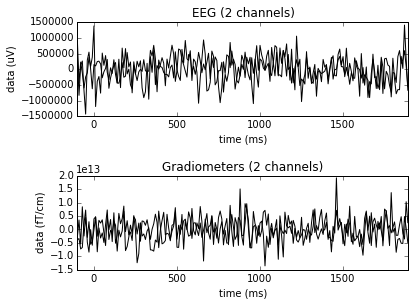

In [40]:
# Now we may treat the epochs object as we would any other
_ = custom_epochs['smiling'].average().plot()

## Creating Evoked Objects
If you already have data that is collapsed across trials, you may also directly create an evoked array.
Its constructor accepts an array of `shape(n_chans, n_times)` in addition to some bookkeeping parameters.

<Evoked  |  comment : 'Smiley faces', time : [-0.100000, 1.890000], n_epochs : 10, n_channels x n_times : 5 x 200>


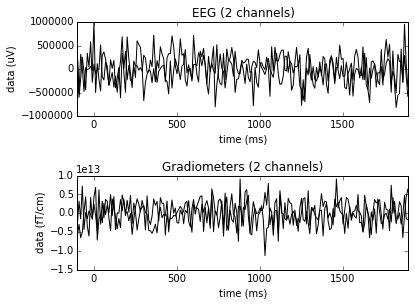

In [31]:
# The averaged data
data_evoked = data.mean(0)

# The number of epochs that were averaged
nave = data.shape[0]

# A comment to describe to evoked (usually the condition name)
comment = "Smiley faces"

# Create the Evoked object
evoked_array = mne.EvokedArray(data_evoked, info, tmin,
                               comment=comment, nave=nave)
print(evoked_array)
_ = evoked_array.plot()